<a href="https://colab.research.google.com/github/rewaaalaa7/California_Housing_Prices_Prediction/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Reading the csv file**

In [2]:
data = pd.read_csv('/content/housing.csv')
data.shape

(20640, 10)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info() # got two issues : 1) missing values of bedrooms 207  2) non numeric values of oceanProximity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
data.describe() #describitve statistics table

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Data Visiualizations**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

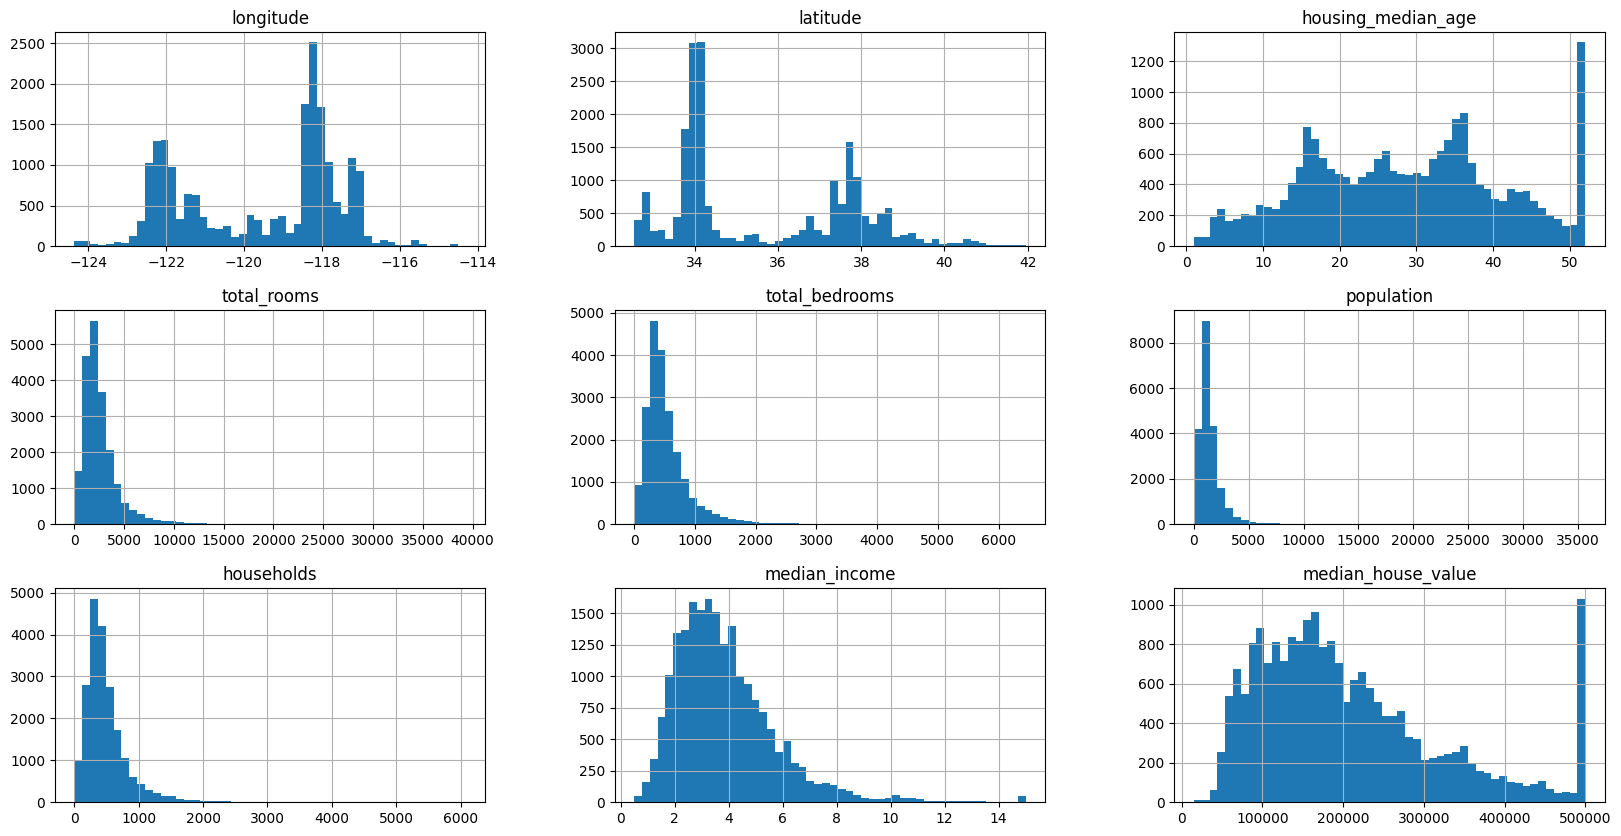

In [7]:
data.hist(bins=50, figsize=(20,10))

<Axes: xlabel='longitude', ylabel='latitude'>

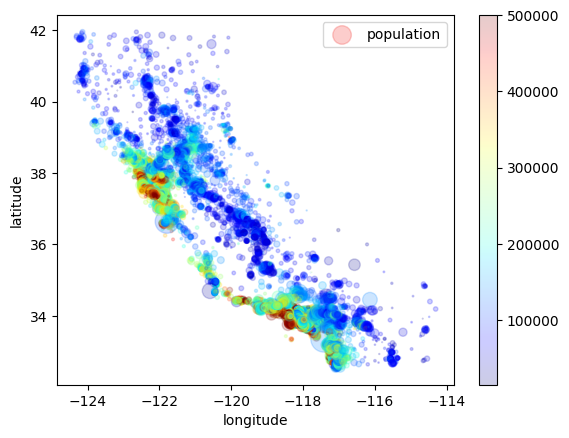

In [8]:
data.plot(kind = "scatter", x= "longitude", y ="latitude", alpha = 0.2,
          s = data["population"]/100, label = "population",
          c=data["median_house_value"], cmap = plt.get_cmap("jet"))

In [9]:
corr_matrix =data.corr()
corr_matrix["median_house_value"].sort_values(ascending = False) # rearranging descendingly the corr of median house value with each col.

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

**Handling missing info**

In [10]:
data_na = data.dropna(subset=["total_bedrooms"]) #drop all observations thats are missing
data_na.shape

(20433, 10)

**Creating dummy variables for categorical variables**

In [11]:
dummies = pd.get_dummies(data_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


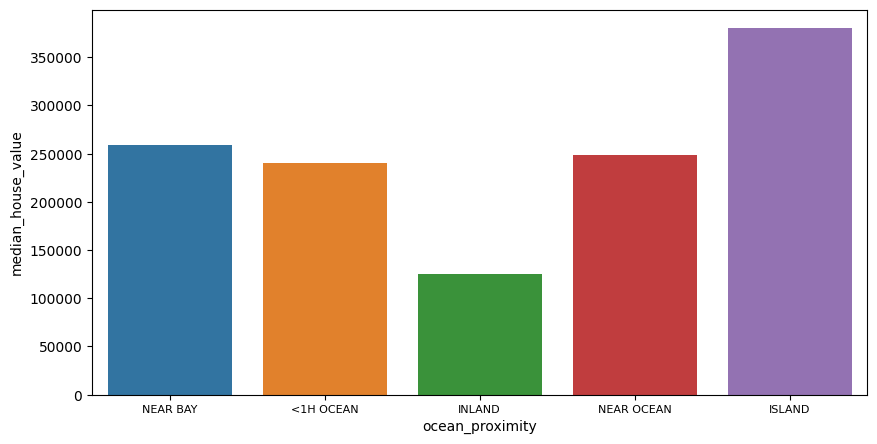

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=data_na,x='ocean_proximity', y='median_house_value',errorbar=None)

# Adjust the font size and rotation of x-axis labels
plt.xticks(fontsize=8)
plt.show()

In [13]:
data__na_dummies = pd.concat([data_na, dummies], axis = 'columns')
data__na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
data_final = data__na_dummies.drop(['ocean_proximity', 'ISLAND'], axis = 'columns')
data_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [15]:
# creating features and label datasets
X = data_final.drop(columns = ['median_house_value'])
X.head()
y = data_final['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

**Linear Regression Model**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.2, random_state = 0)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Prediction :\n", np.round(lin_reg.predict(X_train[:10]), 2))
print("Actual_result :\n", list(y_train[:10]))

Prediction :
 [268903.8   88229.38 141176.25 125715.1  143356.09 125615.    70547.91
 294264.98 221305.26 285202.76]
Actual_result :
 [259900.0, 70500.0, 117800.0, 185400.0, 94200.0, 88900.0, 181300.0, 264600.0, 213400.0, 252400.0]


In [18]:
from sklearn.metrics import mean_absolute_error
y_pred= lin_reg.predict(X_test)
lin_rmae = mean_absolute_error(y_test, y_pred)
lin_rmae

49964.01282683791

**Random Forest**

In [19]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred2= rand_reg.predict(X_test)
rand_rmae = mean_absolute_error(y_test, y_pred2)
rand_rmae

32057.841553706872

**random forest Model with hyperparameters**

In [22]:
n_estimators = [100,200,300]
max_features = ['auto']
max_depth = [None,2,3,4]
min_samples = [2,3]
#min_leaf = [1,2]
#bootstrap = [True, False]

In [23]:
#creating parameters
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples,
               #'min_samples_leaf': min_samples,
               #'bootstrap': bootstrap
              }
print(param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto'], 'max_depth': [None, 2, 3, 4], 'min_samples_split': [2, 3]}


In [24]:
rf = RandomForestRegressor()

In [25]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4], 'max_features': ['auto'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [26]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 200}

In [27]:
print (f'Train Accuracy - : {"%.2f" % rf_grid.score(X_train,y_train)}')
print (f'Test Accuracy - : {"%.2f" % rf_grid.score(X_test,y_test)}')

Train Accuracy - : 0.97
Test Accuracy - : 0.82


**SVR**

In [28]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

SVR()

In [29]:
y_pred3 = svr_reg.predict(X_test)
svr_rmae = mean_absolute_error(y_test, y_pred3)
svr_rmae

88520.55174687643

**SVR with grid search**

In [30]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {'C': [0.25,0.5,1,10],
              'gamma': ['auto', 'scale'],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

svr_grid = SVR()
grid = GridSearchCV(svr_grid ,param_grid, cv =3)
grid.fit(X_train,y_train) '''

"from sklearn.model_selection import GridSearchCV\nfrom sklearn.svm import SVR\n\nparam_grid = {'C': [0.25,0.5,1,10],\n              'gamma': ['auto', 'scale'],\n              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}\n\nsvr_grid = SVR()\ngrid = GridSearchCV(svr_grid ,param_grid, cv =3)\ngrid.fit(X_train,y_train) "

In [ ]:
'''
print(f'train accuracy is : {"%2f" % svr_grid.score(X_train, y_train)}')
print(f'test accuracy is : {"%2f" % svr_grid.score(X_test, y_test)}')